In [40]:
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr

In [41]:
import pandas as pd

In [42]:
# collect data for Amazon from 2017-04-22 to 2018-04-22
start = '2015-04-01'
end = '2018-04-22'

In [43]:
df = pdr.DataReader(name='TDEX.BK', data_source='yahoo', start=start)
#df = pdr.DataReader(name='PTT.BK', data_source='yahoo', start=start)

In [44]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-09,9.87,9.77,9.86,9.78,182100.0,9.78
2022-11-10,9.80,9.74,9.78,9.77,115200.0,9.77
2022-11-11,9.91,9.84,9.89,9.89,1454500.0,9.89
2022-11-14,9.89,9.80,9.89,9.85,63400.0,9.85
2022-11-15,9.89,9.80,9.85,9.80,83926.0,9.80


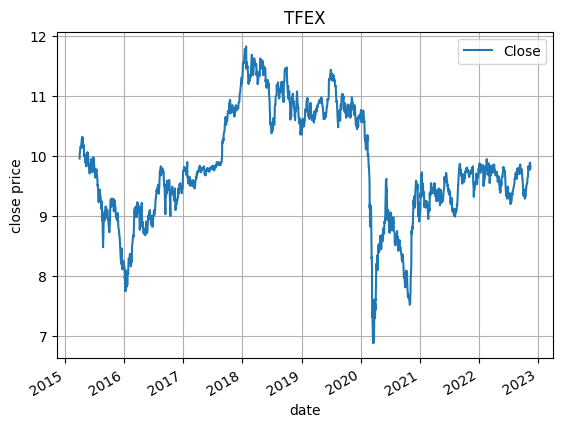

In [45]:
# select only close column
close = df[['Close']]
ax = close.plot(title='TFEX')
ax.set_xlabel('date')
ax.set_ylabel('close price')
ax.grid()
plt.show()

In [202]:
class TDSequential:
    def __init__(self,df) -> None:
        self.date = df.index.to_list()
        self.close = df.Close.to_list()
        self.high = df.High.to_list()
        self.low = df.Low.to_list()
        self.tdst_buy = self._TDBuySetup_()['status']
        self.tdst_sell = self._TDSellSetup_()['status']
        self.tdst_resistance = self._setTDSTResistance_()['resistance']
        self.tdst_support = self._setTDSTSupport_()['support']
        self.perfect_sell = self._PerfectSellSetup_()['status']
        self.perfect_buy = self._PerfectBuySetup_()['status']
        self.resistance_flip = self._ResistanceFlip_()['resistance']
        self.support_flip = self._SupportFlip_()['support']
        self.buy_countdown = self._TDBuyCountdown_()['status']
        self.buy_countdown_count= self._TDBuyCountdown_()['count']
        

    def _BearishTDPriceFlip_(self) -> dict:
        lstBearish = []
        for i in range(len(self.close)):
            if i > 5:
                if (self.close[i] < self.close[i-4]) and (self.close[i-1] > self.close[i-5]):
                    lstBearish.append(True)
                else:
                    lstBearish.append(False)
            else:
                lstBearish.append(False)

        return {'status' : lstBearish, 'close' : self.close}

    def _BullishTDPriceFlip_(self) -> dict:
        lstBullish = []
        for i in range(len(self.close)):
            if i > 5:
                if (self.close[i] > self.close[i-4]) and (self.close[i-1] < self.close[i-5]):
                    lstBullish.append(True)
                else:
                    lstBullish.append(False)
            else:
                lstBullish.append(False)

        return {'status' : lstBullish, 'close' : self.close}

    def _TDBuySetup_(self):
        lstBuySetup = []
        data = self._BearishTDPriceFlip_()
        for i in range(len(data['status'])):
            if i >= 12:
                if data['status'][i-8]:
                    if (data['close'][i]<data['close'][i-4]) and (data['close'][i-1]<data['close'][i-5]) and (data['close'][i-2]<data['close'][i-6]) and (data['close'][i-3]<data['close'][i-7]) and (data['close'][i-4]<data['close'][i-8]) and (data['close'][i-5]<data['close'][i-9]) and (data['close'][i-6]<data['close'][i-10]) and (data['close'][i-7]<data['close'][i-11]) and (data['close'][i-8]<data['close'][i-12]):
                        lstBuySetup.append(True) 
                    else:
                        lstBuySetup.append(False)  
                else:
                    lstBuySetup.append(False)
            else:
                lstBuySetup.append(False)
        return {'status' : lstBuySetup, 'close' : self.close}
    
    def _TDSellSetup_(self):
        lstSellSetup = []
        data = self._BullishTDPriceFlip_()
        for i in range(len(data['status'])):
            if i >= 12:
                if data['status'][i-8]:
                    if (data['close'][i]>data['close'][i-4]) and (data['close'][i-1]>data['close'][i-5]) and (data['close'][i-2]>data['close'][i-6]) and (data['close'][i-3]>data['close'][i-7]) and (data['close'][i-4]>data['close'][i-8]) and (data['close'][i-5]>data['close'][i-9]) and (data['close'][i-6]>data['close'][i-10]) and (data['close'][i-7]>data['close'][i-11]) and (data['close'][i-8]>data['close'][i-12]):
                        lstSellSetup.append(True) 
                    else:
                        lstSellSetup.append(False)  
                else:
                    lstSellSetup.append(False)
            else:
                lstSellSetup.append(False)
        return {'status' : lstSellSetup, 'close' : self.close}

    def _setTDSTResistance_(self):
        lstResistancePrice = []
        resistance = 0
        data = self._TDBuySetup_()
        high = self.high
        for i in range(len(data['status'])):
            if (i < (len(data['status'])-8)):
                if data['status'][i+8]:
                    resistance = high[i]
                    lstResistancePrice.append(resistance)
                else:
                    lstResistancePrice.append(resistance)
            else:
                lstResistancePrice.append(resistance)     
        return {'resistance': lstResistancePrice}

    def _setTDSTSupport_(self):
        lstSupportPrice = []
        support = 0
        data = self._TDSellSetup_()
        low = self.low
        for i in range(len(data['status'])):
            if (i < (len(data['status'])-8)):
                if data['status'][i+8]:
                    support = low[i]
                    lstSupportPrice.append(support)
                else:
                    lstSupportPrice.append(support)
            else:
                lstSupportPrice.append(support)
        return {'support': lstSupportPrice}

    def _ResistanceFlip_(self):
        lstResistancePrice = []
        resistance = 0
        data = self._TDBuySetup_()
        high = self.high
        for i in range(len(data['status'])):
            if data['status'][i]:
                resistance = high[i]
                lstResistancePrice.append(resistance)
            else:
                lstResistancePrice.append(resistance)   
        return {'resistance': lstResistancePrice}

    def _SupportFlip_(self):
        lstSupportPrice = []
        support = 0
        data = self._BullishTDPriceFlip_()
        low = self.low
        for i in range(len(data['status'])):
            if data['status'][i]:
                support = low[i]
                lstSupportPrice.append(support)
            else:
                lstSupportPrice.append(support)
        return {'support': lstSupportPrice}

    def _PerfectSellSetup_(self):
        data = self._TDSellSetup_()['status']
        high = self.high
        lst = []
        for i in range(len(data)):
            if data[i]:
                if ((high[i] >= high[i-2]) and (high[i] >= high[i-3])) or ((high[i-1] >= high[i-2]) and (high[i-2] >= high[i-3])):
                    lst.append('Perfect')
                else:
                    lst.append('Unperfect')
            else:
                lst.append("None")
        return {'status' : lst}

    def _PerfectBuySetup_(self):
        data = self._TDBuySetup_()['status']
        low = self.low
        lst = []
        for i in range(len(data)):
            if data[i]:
                if ((low[i] <= low[i-2]) and (low[i] <= low[i-3])) or ((low[i-1] <= low[i-2]) and (low[i-2] <= low[i-3])):
                    lst.append('Perfect')
                else:
                    lst.append('Unperfect')
            else:
                lst.append("None")
        return {'status' : lst}

    def _PerlRuleSellSetup_(self):
        pass

    def _PerlRuleBuySetup_(self):
        pass

    def _TDSellCountdown_(self):
        high = self.high
        close = self.close
        data = self._TDSellSetup_()['status']
        for i in range(len(data)):
            if data[i]:
                pass
    
    def _TDBuyCountdown_(self):
        low = self.low
        close = self.close
        data = self._TDBuySetup_()['status']
        lst = []
        lstCount = []
        count = 0
        for i in range(len(data)):
            lstCount.append(count)
            if i >=2:
                if count < 1:
                    if data[i]:
                 
                        if (close[i] <= low[i-1]) and (close[i] <= low[i-2]):
                            count += 1
                            lst.append(False)

                             
                        else:
                            lst.append(False)

                    else:
                        lst.append(False)

                elif ((count >= 1) and (count < 13)):

                    if (close[i] <= low[i-1]) and (close[i] <= low[i-2]):                       
                        lst.append(False)
                        count += 1


                    else:
                        lst.append(False)

                
                elif count > 12:
                    lst.append(True)
                    count -= 13

            else:
                lst.append(False)

        return {'status' : lst, 'count' : lstCount}


    
    def Summary(self):
        return {'date' : self.date,  'close' : self.close, 'tdstSellSetup' : self.tdst_sell, 'tdstBuySetup' : self.tdst_buy, 'tdstSupport' : self.tdst_support, 'tdstResistance' : self.tdst_resistance, 'perfectSell' :self.perfect_sell, 'perfectBuy' : self.perfect_buy, 'resistanceFlip' : self.resistance_flip, 'supportFlip' : self.support_flip, 'buyCountdown' : self.buy_countdown, "buyCountdownCount": self.buy_countdown_count}



In [203]:
tfex = TDSequential(df)

In [204]:
list(filter(lambda x : x == True, tfex._TDBuyCountdown_()['status']))

[True, True, True, True, True, True, True, True]

In [205]:
df1 = pd.DataFrame(tfex.Summary())

In [206]:
df1[800:805]

,date,close,tdstSellSetup,tdstBuySetup,tdstSupport,tdstResistance,perfectSell,perfectBuy,resistanceFlip,supportFlip,buyCountdown,buyCountdownCount
800,2018-07-16,10.52,False,False,10.38,11.25,None,None,10.83,10.38,False,0
801,2018-07-17,10.52,False,False,10.38,11.25,None,None,10.83,10.38,False,0
802,2018-07-18,10.58,False,False,10.38,11.25,None,None,10.83,10.38,False,0
803,2018-07-19,10.67,False,False,10.58,11.25,None,None,10.83,10.58,False,0
804,2018-07-20,10.83,False,False,10.58,11.25,None,None,10.83,10.58,False,0


In [207]:
df1[df1['buyCountdown']==True]

,date,close,tdstSellSetup,tdstBuySetup,tdstSupport,tdstResistance,perfectSell,perfectBuy,resistanceFlip,supportFlip,buyCountdown,buyCountdownCount
71,2015-07-22,9.52,False,False,0.00,9.77,None,None,10.07,9.69,True,13
159,2015-11-26,8.83,False,False,0.00,9.05,None,None,9.03,8.96,True,13
205,2016-02-04,8.31,False,False,7.81,9.05,None,None,8.67,7.81,True,13
435,2017-01-18,9.75,False,False,9.11,9.78,None,None,9.42,9.79,True,13
1090,2019-09-23,10.76,False,False,10.78,11.33,None,None,11.13,10.78,True,13
1268,2020-06-15,8.93,False,False,8.71,8.65,None,None,6.97,8.71,True,13
1352,2020-10-20,7.64,False,False,8.71,8.08,None,None,7.93,7.88,True,13
1644,2022-01-07,9.75,False,False,9.06,9.83,None,None,9.61,9.65,True,13


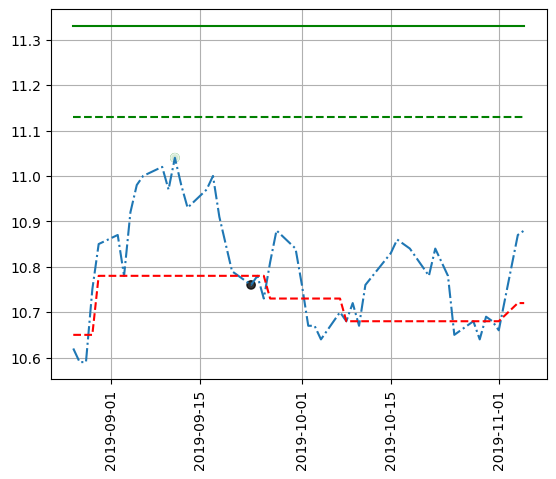

In [217]:
rangeData = df1[1070:1120]

plt.plot(rangeData.date, rangeData.close, ls = '-.')
#plt.plot(rangeData.date, rangeData.tdstSupport, c='r')
plt.plot(rangeData.date, rangeData.tdstResistance, c='g')

plt.plot(rangeData.date, rangeData.supportFlip, c = 'r', ls = "--")
plt.plot(rangeData.date, rangeData.resistanceFlip, c = 'g', ls = "--")

#buy setup red
buy_colors = {True:'red', False:'white'}

#sell setup green
sell_colors = {True:'green', False:'white'}

buy_count_colors = {True:'black', False:'white'}

plt.scatter(rangeData.date, rangeData.close, c = rangeData.tdstBuySetup.map(buy_colors),alpha=0.8)
plt.scatter(rangeData.date, rangeData.close, c = rangeData.tdstSellSetup.map(sell_colors),alpha=0.8)
plt.scatter(rangeData.date, rangeData.close, c = rangeData.buyCountdown.map(buy_count_colors),alpha=0.8)


plt.xticks(rotation = 90)
plt.grid()

In [52]:
df1[700:750]

,date,close,tdstSellSetup,tdstBuySetup,tdstSupport,tdstResistance,perfectSell,perfectBuy,resistanceFlip,supportFlip
700,2018-02-16,11.33,False,False,11.2,9.78,None,None,9.42,11.20
701,2018-02-19,11.36,False,False,11.2,9.78,None,None,9.42,11.20
702,2018-02-20,11.32,False,False,11.2,9.78,None,None,9.42,11.20
703,2018-02-21,11.34,False,False,11.2,9.78,None,None,9.42,11.20
704,2018-02-22,11.34,True,False,11.2,9.78,Perfect,None,9.42,11.20
705,2018-02-23,11.44,False,False,11.2,9.78,None,None,9.42,11.20
706,2018-02-26,11.60,False,False,11.2,9.78,None,None,9.42,11.20
707,2018-02-27,11.66,False,False,11.2,9.78,None,None,9.42,11.20
708,2018-02-28,11.69,False,False,11.2,9.78,None,None,9.42,11.20
709,2018-03-02,11.51,False,False,11.2,9.78,None,None,9.42,11.20


In [53]:
list(filter(lambda x : x == True, tfex._TDBuySetup_()['status']))

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]